<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-1000-uniformly-distributed-random-numbers-in-the-inteval-[0,1)" data-toc-modified-id="Create-1000-uniformly-distributed-random-numbers-in-the-inteval-[0,1)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create 1000 uniformly distributed random numbers in the inteval [0,1)</a></span></li><li><span><a href="#Repeat-for-a-normal-distribution-with-$\mu=10$,-$\sigma=4$" data-toc-modified-id="Repeat-for-a-normal-distribution-with-$\mu=10$,-$\sigma=4$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Repeat for a normal distribution with $\mu=10$, $\sigma=4$</a></span></li><li><span><a href="#lognormal-random-numbers-with-$\mu=1$,-$\log-\sigma=0.1$" data-toc-modified-id="lognormal-random-numbers-with-$\mu=1$,-$\log-\sigma=0.1$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>lognormal random numbers with $\mu=1$, $\log \sigma=0.1$</a></span></li><li><span><a href="#Correlated-random-numbers" data-toc-modified-id="Correlated-random-numbers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Correlated random numbers</a></span></li><li><span><a href="#Functions-of-random-variables" data-toc-modified-id="Functions-of-random-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Functions of random variables</a></span></li></ul></div>

# Random number generation

Some examples demonstrating how to generate random numbers using
https://docs.scipy.org/doc/numpy/reference/routines.random.html

## Create 1000 uniformly distributed random numbers in the inteval [0,1)

In [1]:
import numpy as np
import numpy.random as rn
import pandas as pd
from matplotlib import colors
from matplotlib import pyplot as plt

my_seed = 5
rn.seed(my_seed)
uni_dist = rn.rand(1000)

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'histogram of uniform dist')]

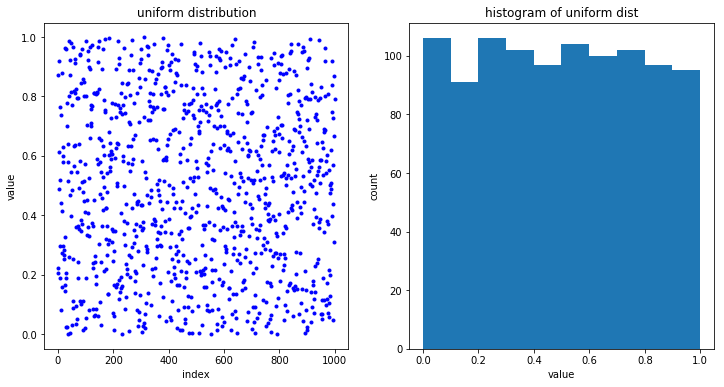

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(uni_dist, "b.")
ax1.set(title="uniform distribution", ylabel="value", xlabel="index")
ax2.hist(uni_dist)
ax2.set(title="histogram of uniform dist", ylabel="count", xlabel="value")

## Repeat for a normal distribution with $\mu=10$, $\sigma=4$

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'histogram of normal dist')]

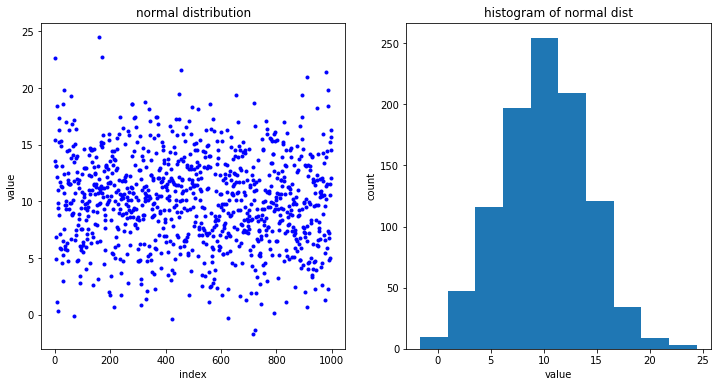

In [3]:
normal_dist = rn.normal(10, 4, (1000,))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(normal_dist, "b.")
ax1.set(title="normal distribution", ylabel="value", xlabel="index")
ax2.hist(normal_dist)
ax2.set(title="histogram of normal dist", ylabel="count", xlabel="value")

## lognormal random numbers with $\mu=1$, $\log \sigma=0.1$

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'value'),
 Text(0.5, 1.0, 'histogram of lognormal dist')]

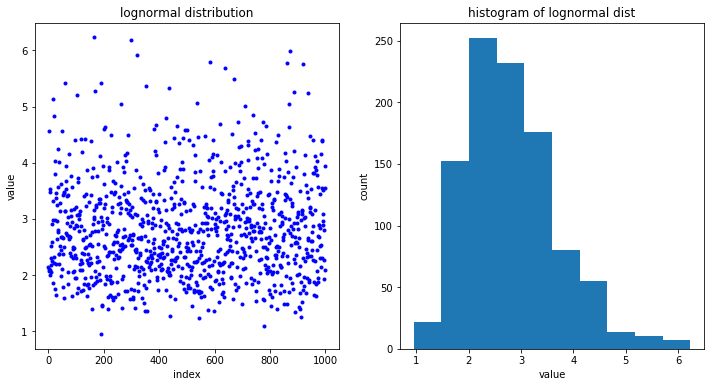

In [4]:
log_normal_dist = rn.lognormal(1, 0.3, (1000,))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(log_normal_dist, "b.")
ax1.set(title="lognormal distribution", ylabel="value", xlabel="index")
ax2.hist(log_normal_dist)
ax2.set(title="histogram of lognormal dist", ylabel="count", xlabel="value")

## Correlated random numbers

In [5]:
def makeRandom(
    meanx=None, stdx=None, meany=None, stdy=None, rho=None, numpoints=100000
):

    """
    return a tuple with two vectors (xvec,yvec) giving the
    coordinates of numpoints chosen from a two dimensional
    Gauassian distribution

    Parameters
    ----------

    meanx: float -- mean in x direction
    stdx:  float -- standard deviation in x direction
    meany: float -- mean in y direction
    stdy:  float -- standar deviation in y direction
    rho:   float -- correlation coefficient
    numpoints:  length of returned xvec and yvec


    Returns
    -------

    (xvec, yvec): tuple of ndarray vectors of length numpoints

    Example
    -------

    invalues={'meanx':450.,
              'stdx':50,
              'meany':-180,
              'stdy':40,
              'rho':0.8}

    chanx,chany=makeRandom(**invalues)


    """
    sigma = np.array([stdx ** 2.0, rho * stdx * stdy, rho * stdx * stdy, stdy ** 2.0])
    sigma.shape = [2, 2]
    meanvec = [meanx, meany]
    outRandom = rn.multivariate_normal(meanvec, sigma, [numpoints])
    chan1 = outRandom[:, 0]
    chan2 = outRandom[:, 1]
    return (chan1, chan2)

In [6]:
invalues = {
    "meanx": 450.0,
    "stdx": 50,
    "meany": -180,
    "stdy": 40,
    "rho": 0.8,
    "numpoints": 25000,
}

chanx, chany = makeRandom(**invalues)

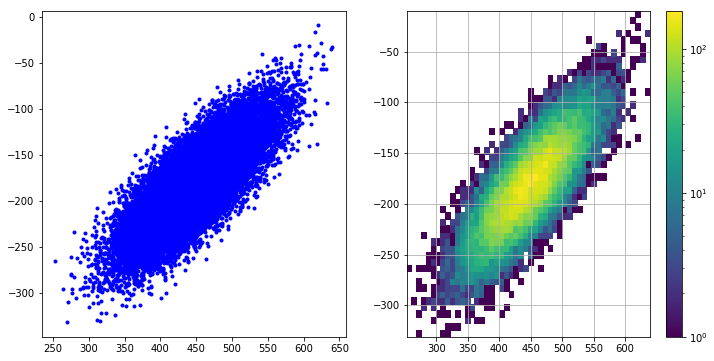

In [7]:
# https://matplotlib.org/gallery/statistics/hist.html
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(chanx, chany, "b.")
h, x, y, im = ax2.hist2d(chanx, chany, bins=(50, 50), norm=colors.LogNorm())
fig.colorbar(im)
ax2.grid(True)

## Functions of random variables

In [8]:
out = pd.concat([pd.Series(chanx), pd.Series(chany)], axis=1)
out.columns = ["x", "y"]


def cubic(row):
    return row["y"] ** 3.0 + row["x"] ** 2.0


z = out.apply(cubic, axis=1)
out["z"] = z
out.head()

,x,y,z
0,395.687721,-253.910553,-1.621319e+07
1,493.577442,-122.191729,-1.580804e+06
2,462.873524,-221.510046,-1.065452e+07
3,358.473811,-238.541509,-1.344500e+07
4,547.724474,-127.921791,-1.793308e+06


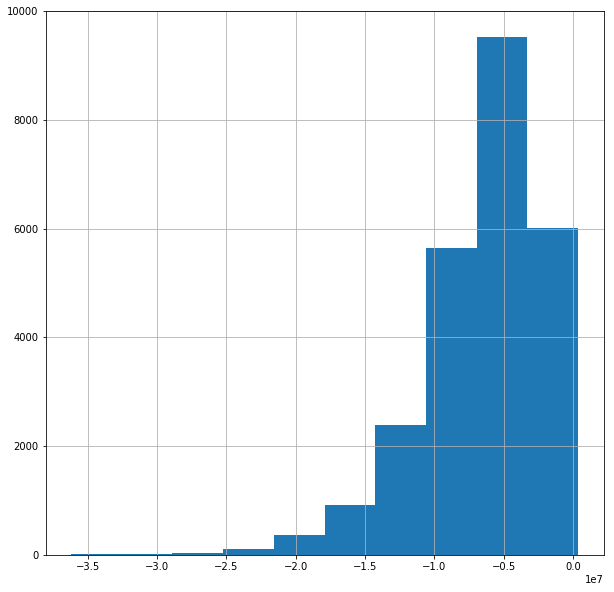

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist("z", data=out)
ax.grid(True)

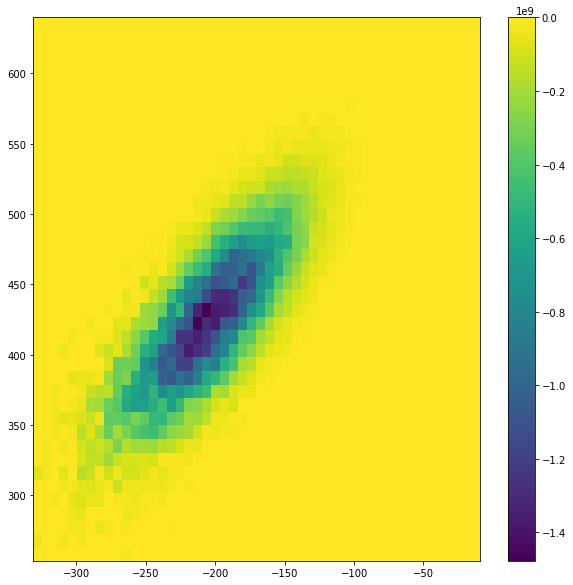

In [10]:
x, y, z = out["x"], out["y"], out["z"]
H, xedges, yedges = np.histogram2d(x, y, weights=z, bins=(40, 50))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im = ax.pcolormesh(yedges, xedges, H)
fig.colorbar(im)
# count, x, y =np.histogram2d(x_axis, y_axis, bins=numbins)
# H/=count